# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 27: HERC with Equal Weights within Clusters (HERC2)

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2409%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,-0.1466%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8855%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2844%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1693%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5366%,-0.4607%,0.5800%,-1.9919%


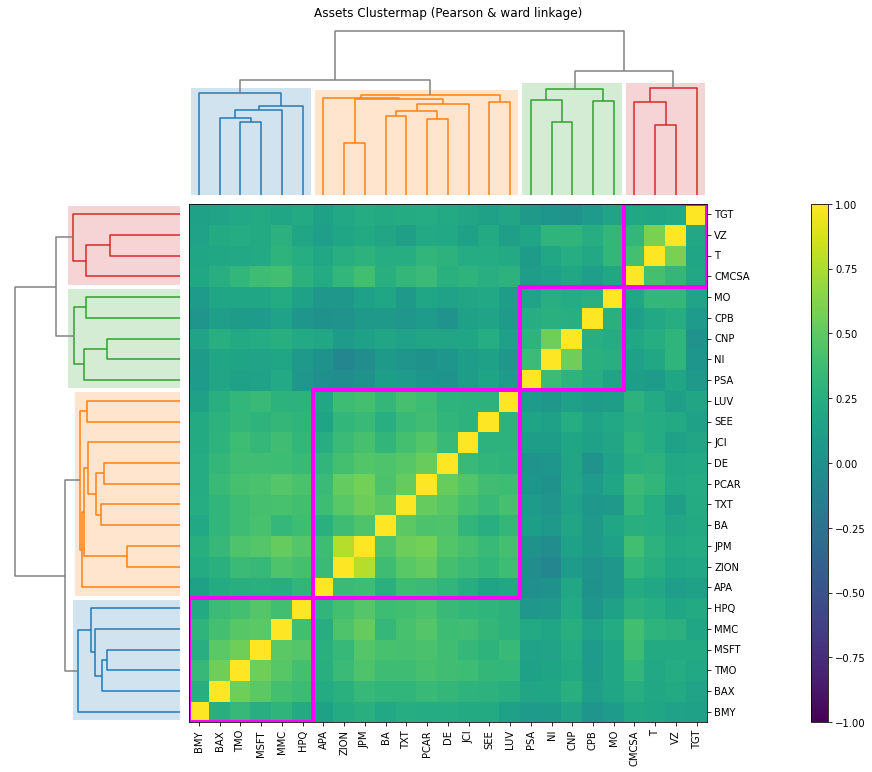

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

The graph above suggest that optimal number of clusters are four.

## 2. Estimating HERC and HERC2 Portfolios

The HERC2 portfolio is just a modification of HERC portfolio making the weights within clusters equal and no based on naive risk parity like original HERC portfolio.

### 2.1 Calculating the HERC and HERC2 portfolios

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w1 = port.optimization(model='HERC',
                       codependence=codependence,
                       covariance='hist',
                       rm=rm,
                       rf=rf,
                       linkage=linkage,
                       max_k=max_k,
                       leaf_order=leaf_order)

w2 = port.optimization(model='HERC2',
                       codependence=codependence,
                       covariance='hist',
                       rm=rm,
                       rf=rf,
                       linkage=linkage,
                       max_k=max_k,
                       leaf_order=leaf_order)

w = pd.concat([w1, w2], axis=1)
w.columns = ['HERC', 'HERC2']

display(w.sort_values(by='HERC', ascending=False).style.format("{:.2%}").background_gradient(cmap='YlGn'))

,HERC,HERC2
VZ,8.79%,6.38%
T,7.71%,6.38%
CNP,7.64%,6.33%
NI,7.37%,6.33%
MMC,7.25%,4.08%
PSA,6.95%,6.33%
CMCSA,5.84%,6.38%
MO,5.78%,6.33%
BAX,4.55%,4.08%
TMO,4.05%,4.08%


### 2.2 Plotting Risk Contribution

<AxesSubplot:title={'center':'Risk (Standard Deviation) Contribution per Asset'}>

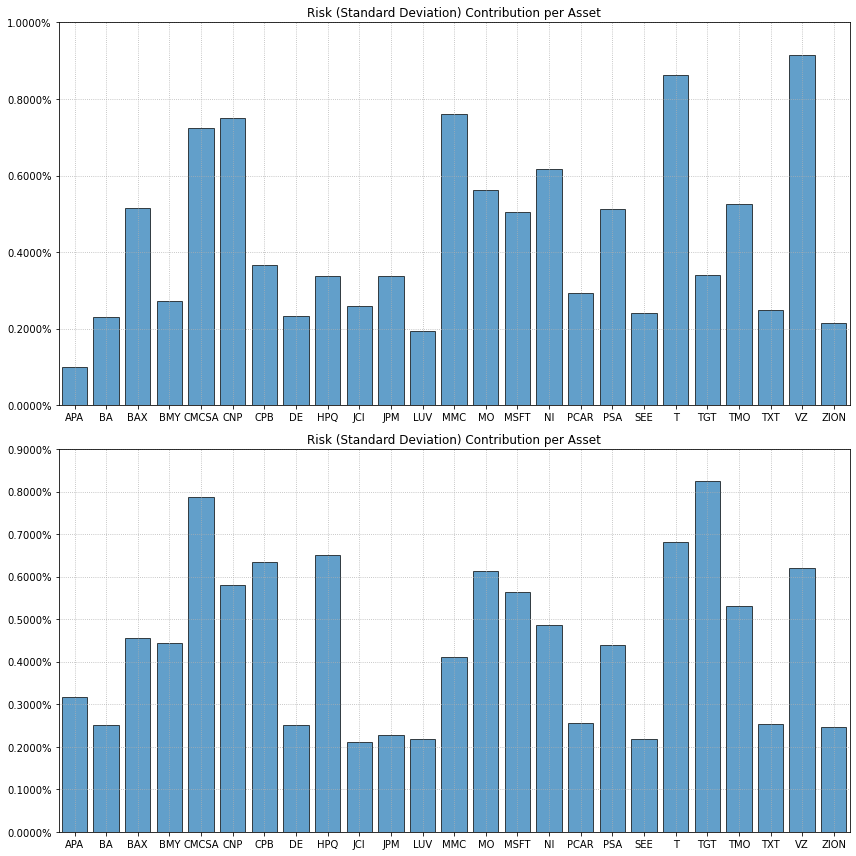

In [5]:
import matplotlib.pyplot as plt

# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

fig, ax = plt.subplots(2,1, figsize=(12, 12))

ax = np.ravel(ax)
rp.plot_risk_con(w=w1,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 rf=0,
                 alpha=0.05,
                 color="tab:blue",
                 height=6,
                 width=10,
                 t_factor=252,
                 ax=ax[0])

rp.plot_risk_con(w=w2,
                 cov=cov,
                 returns=returns,
                 rm=rm,
                 rf=0,
                 alpha=0.05,
                 color="tab:blue",
                 height=6,
                 width=10,
                 t_factor=252,
                 ax=ax[1])


### 2.3 Calculate Optimal HERC and HERC2 Portfolios for Several Covariance Estimators

In [6]:
# Covariance estimators available:
#
# 'hist': use historical estimates.
# 'ewma1'': use ewma with adjust=True, see `EWM <https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows>`_ for more details.
# 'ewma2': use ewma with adjust=False, see `EWM <https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows>`_ for more details.
# 'ledoit': use the Ledoit and Wolf Shrinkage method.
# 'oas': use the Oracle Approximation Shrinkage method.
# 'shrunk': use the basic Shrunk Covariance method.

models = ['HERC'] * 6 + ['HERC2'] * 6
covariances = ['hist', 'ewma1', 'ewma2', 'ledoit', 'oas', 'shrunk'] * 2

w_s = pd.DataFrame([])

for i,j in zip(models, covariances):
    w = port.optimization(model=i,
                          codependence=codependence,
                          covariance=j,
                          rm=rm,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = zip(models, covariances)

In [7]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,"('HERC', 'hist')","('HERC', 'ewma1')","('HERC', 'ewma2')","('HERC', 'ledoit')","('HERC', 'oas')","('HERC', 'shrunk')","('HERC2', 'hist')","('HERC2', 'ewma1')","('HERC2', 'ewma2')","('HERC2', 'ledoit')","('HERC2', 'oas')","('HERC2', 'shrunk')"
APA,0.64%,0.09%,0.09%,0.66%,0.65%,0.72%,1.84%,1.71%,1.71%,1.86%,1.85%,1.92%
BA,1.73%,0.78%,0.78%,1.75%,1.74%,1.83%,1.84%,1.71%,1.71%,1.86%,1.85%,1.92%
BAX,4.55%,2.59%,2.59%,4.56%,4.56%,4.58%,4.08%,4.85%,4.85%,4.08%,4.08%,4.09%
BMY,2.65%,3.42%,3.42%,2.69%,2.67%,2.83%,4.08%,4.85%,4.85%,4.08%,4.08%,4.09%
CMCSA,5.84%,4.65%,4.65%,5.85%,5.85%,5.88%,6.38%,6.60%,6.60%,6.36%,6.37%,6.27%
CNP,7.64%,2.45%,2.45%,7.58%,7.61%,7.37%,6.33%,5.49%,5.49%,6.31%,6.32%,6.24%
CPB,3.90%,5.61%,5.61%,3.95%,3.93%,4.10%,6.33%,5.49%,5.49%,6.31%,6.32%,6.24%
DE,1.73%,1.78%,1.78%,1.75%,1.75%,1.83%,1.84%,1.71%,1.71%,1.86%,1.85%,1.92%
HPQ,2.25%,2.49%,2.49%,2.29%,2.28%,2.44%,4.08%,4.85%,4.85%,4.08%,4.08%,4.09%
JCI,2.25%,1.96%,1.96%,2.27%,2.26%,2.32%,1.84%,1.71%,1.71%,1.86%,1.85%,1.92%


<AxesSubplot:>

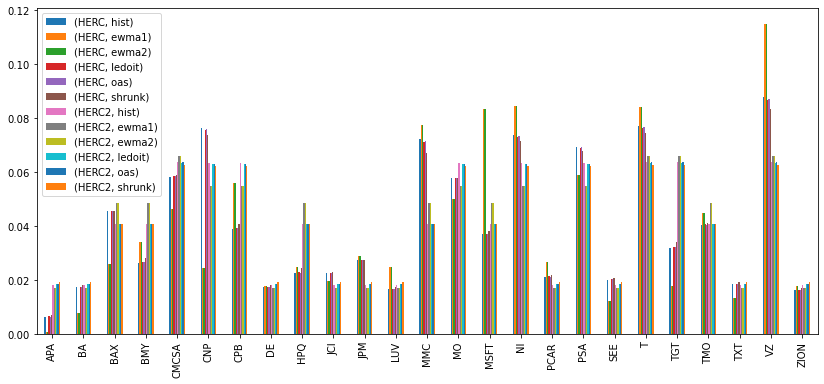

In [8]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)